In [1]:
import spacy
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import re
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt


In [2]:
directory = '/home/luluvyd/corpus/aclImdb/sample/'
filename = '/home/luluvyd/corpus/aclImdb/test/example_pos/0_10.txt'
nlp = spacy.load('en_core_web_md')

In [3]:
def analyzePOS(doc):  
    '''
    parameter : doc is an article by a single author
    return : counter of POS tags
    '''
    counter = Counter([token.pos_ for token in doc])
    return counter

def rankCounter(counter): 
    '''
    parameter : counter of an article by a single author
    '''
    if len(counter) == 0:
        return None, None
    else:
        c = counter.most_common(20)
        return zip(*c)

def sumCounter(counter): 
    '''
    parameter : counter
    return : sum of counter values
    '''
    return sum(counter.values())

    
def analyzeSentence(doc):
    '''
    parameter : doc is an article by a single author
    assume sentence length is measured by number of words
    return : counter of sentence lengths'''
    lengths = Counter([len(sentence) for sentence in doc.sents])
    for sentence in doc.sents: 
        print("SENTENCE : " + sentence.text)
    return lengths

def analyzeWordLength(doc): 
    '''parameter : doc is an article by a single author
    return : counter of word lengths
    '''
    counter = Counter([len(token.lemma_) for token in doc])
    return counter

def analyzePunctuation(doc): 
    '''parameter: doc is an article by a single author
    return : counter of punctuation symbols '''
    counter = Counter([token.text for token in doc if token.pos_=='PUNCT'])
    return counter

def analyzePronoun(doc): 
    '''parameter: doc is an article by a single author
    return : counter of all pronoun '''
    counter = Counter([token.text.lower() for token in doc if (token.tag_== 'PRP' or 
                       token.tag_== 'PRP$' or 
                       token.tag_== 'WP' or 
                       token.tag_== 'WP$')])
    return counter

def analyzePronounPRP(doc):
    '''parameter: doc is an article by a single author
    return : counter of PRP '''
    counter = Counter([token.text.lower() for token in doc if token.tag_== 'PRP'])
    return counter

def analyzePronounPRPD(doc):
    '''parameter: doc is an article by a single author
    return : counter of PRP '''
    counter = Counter([token.text.lower() for token in doc if token.tag_== 'PRP$'])
    return counter

def analyzePronounWP(doc):
    '''parameter: doc is an article by a single author
    return : counter of WP '''
    counter = Counter([token.text.lower() for token in doc if token.tag_== 'WP'])
    return counter

def analyzePronounWPD(doc):
    '''parameter: doc is an article by a single author
    return : counter of WP$ '''
    counter = Counter([token.text.lower() for token in doc if token.tag_== 'WP$'])
    return counter

def analyzePronounCategories(doc):
    '''parameter: doc is an article by a single author
    return : counter of all pronoun categories '''
    counter = Counter([token.tag_ for token in doc if (token.tag_== 'PRP' or 
                       token.tag_== 'PRP$' or 
                       token.tag_== 'WP' or 
                       token.tag_== 'WP$')])
    return counter

def analyzeVerb(doc): 
    '''parameter: doc is an article by a single author
    return : counter of verb words '''
    counter = Counter([token.lemma_ for token in doc if token.pos_=='VERB'])
    return counter

def analyzeVerbRoot(doc): 
    '''parameter: doc is an article by a single author
    return : counter of verb words '''
    counter = Counter([token.lemma_ for token in doc if token.pos_=='VB'])
    return counter

In [59]:
parsed_text = 'This is an awesome sentence. Where is the cat?'
doc = nlp(parsed_text)
counter = analyzePOS(doc)
print(counter)

Counter({'DET': 3, 'NOUN': 2, 'PUNCT': 2, 'VERB': 2, 'ADV': 1, 'ADJ': 1})


In [60]:
parsed_text = 'This is an awesome sentence. Where is the cat?'
doc = nlp(parsed_text)
counter = analyzeSentence(doc)
print(counter)

SENTENCE : This is an awesome sentence.
SENTENCE : Where is the cat?
Counter({5: 1, 6: 1})


In [61]:
parsed_text = 'This is an awesome sentence. Where is the cat?'
doc = nlp(parsed_text)
counter = analyzeWordLength(doc)
print(counter)

Counter({2: 3, 1: 2, 3: 2, 4: 1, 5: 1, 7: 1, 8: 1})


In [62]:
parsed_text = 'This is an awesome sentence. Where is the cat?'
doc = nlp(parsed_text)
counter = analyzePunctuation(doc)
print(counter)

Counter({'.': 1, '?': 1})


In [63]:
parsed_text = 'This is an awesome sentence. Where is the cat?'
doc = nlp(parsed_text)
counterPos = analyzePOS(doc)
counterPunc = analyzePunctuation(doc)
print(sumCounter(counterPunc) / sumCounter(counterPos)) 

0.18181818181818182


In [81]:
parsed_text = 'This is an awesome sentence. My is better. Their food is worse. It is it. Who is good? What is in him?'
doc = nlp(parsed_text)
counterPunc = analyzePronoun(doc)
print(counterPunc) 

Counter({'it': 2, 'their': 1, 'who': 1, 'what': 1, 'him': 1, 'my': 1})


In [82]:
parsed_text = 'This is an awesome sentence. My is better. Their food is worse. It is it. Who is good? What is in him?'
doc = nlp(parsed_text)
counterPRP = analyzePronounPRP(doc)
print(counterPRP) 

Counter({'it': 2, 'him': 1})


In [83]:
parsed_text = 'This is an awesome sentence. My is better. Their food is worse. It is it. Who is good? What is in him?'
doc = nlp(parsed_text)
counterPRPD = analyzePronounPRPD(doc)
print(counterPRPD) 

Counter({'their': 1, 'my': 1})


In [84]:
parsed_text = 'This is an awesome sentence. My is better. Their food is worse. It is it. Who is good? What is in him?'
doc = nlp(parsed_text)
counterPWP = analyzePronounWP(doc)
print(counterPWP) 

Counter({'who': 1, 'what': 1})


In [36]:
parsed_text = 'This is an awesome sentence. My is better. Their food is worse. It is it. Who is good? What is in him?'
doc = nlp(parsed_text)
counterPWPD = analyzePronounWPD(doc)
print(counterPWPD) 

Counter()


In [85]:
parsed_text = 'This is an awesome sentence. My is better. Their food is worse. It is it. Who is good? What is in him?'
doc = nlp(parsed_text)
counterPCat = analyzePronounCategories(doc)
print(counterPCat) 

Counter({'PRP': 3, 'PRP$': 2, 'WP': 2})


In [65]:
parsed_text = 'This is an awesome sentence. I am running. It rains.'
doc = nlp(parsed_text)
counterVerb = analyzeVerb(doc)
print(counterVerb) 

Counter({'be': 2, 'rain': 1, 'run': 1})


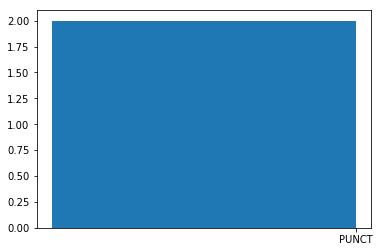

In [9]:
labels, values = rankCounter(counter)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

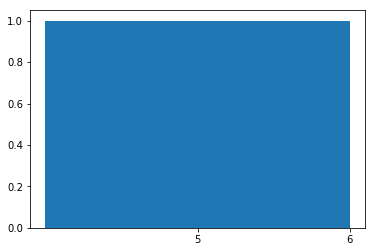

In [20]:
labels, values = rankCounter(counter)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

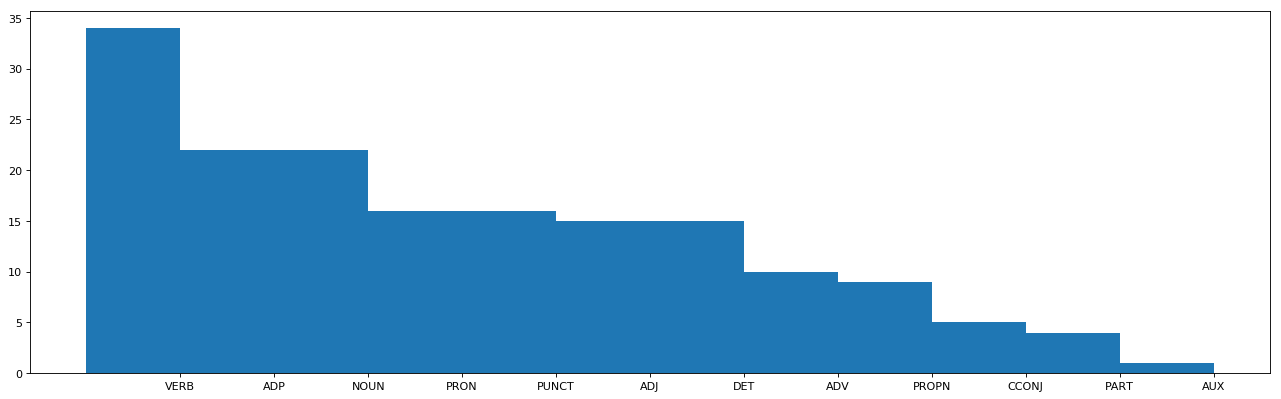

In [24]:
if __name__ == "__main__":  
    with open(filename, 'r') as f:
        text = f.read()
        nlp = spacy.load('en_core_web_md')
        doc = nlp(text)
        counter = analyzePOS(doc)
        
        plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')

        labels, values = rankCounter(counter)
        indexes = np.arange(len(labels))
        width = 1
        plt.bar(indexes, values, width)
        plt.xticks(indexes + width * 0.5, labels)
        plt.show()
    f.close()
                


i : 0
i : 1
i : 2


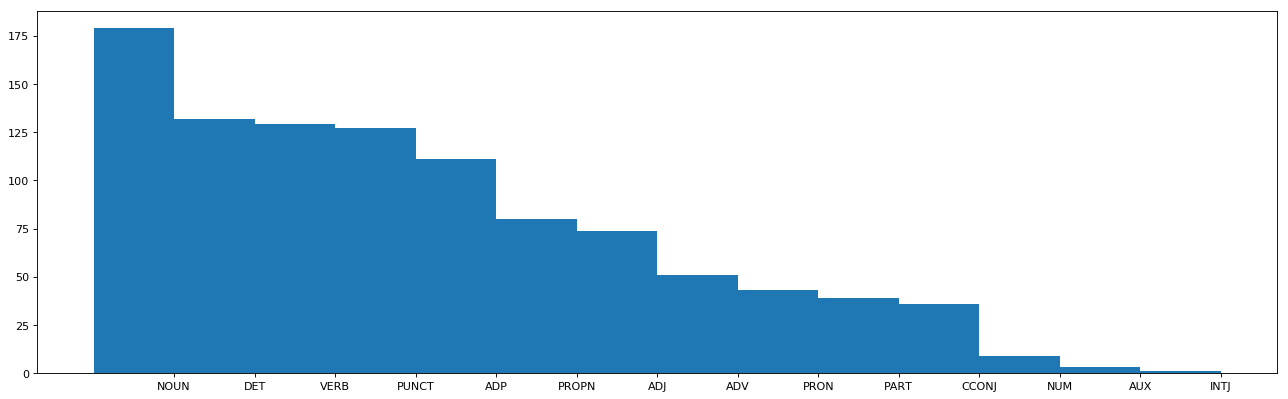

In [36]:
'''
POS histogram
error: doc input string cannot succeed 1 million characters
problem: iterating over text is too slow, parallelize
'''

# read_files = glob.glob("/home/luluvyd/corpus/aclImdb/train/pos/*.txt")
read_files = glob.glob(directory + '*.txt')

counter = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        counter += analyzePOS(text) 
        i += 1
        
        
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counter)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

i : 0
SENTENCE : At first glance, this film looks like the Keifer Sutherland series 24 for the big screen.
SENTENCE : With the focus on a plot to assassinate the President of the United States, a race against time, and plenty of Secret Service agents, the agency under the spotlight in The Sentinel.<br
SENTENCE : /><br
SENTENCE : />But
SENTENCE : wait, the protagonist turns out to be Michael Douglas' character Pete Garrison instead, a veteran Secret Service agent famed for taking the bullet for Reagan in 1981.
SENTENCE : The SS agents are specially trained to "take the bullet", which is what makes them special - who in the right mind will put themselves in the line of a bullet and a target?
SENTENCE : But Garrison gets implicated in the assassination plot, and has to run for his life while at the same time doing his bit of investigations into the plot.
SENTENCE : All this because of his failure in a polygraph test, due to his adulterous banging of the First Lady (Kim Basinger).
SENTENCE

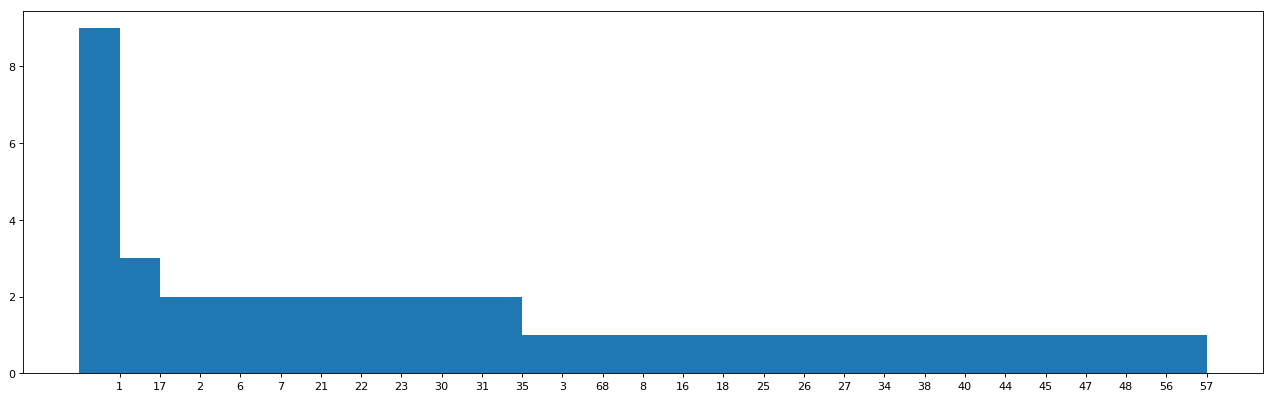

In [36]:
'''
Sentence length histogram
error: doc input string cannot succeed 1 million characters
problem: non-edited opinion text can have long and publish unaccepted sentence structures
'''

# read_files = glob.glob("/home/luluvyd/corpus/aclImdb/train/pos/*.txt")
read_files = glob.glob(directory + '*.txt')

counter = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counter += analyzeSentence(doc) 
        i += 1
        
        
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counter)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

i : 0
i : 1
i : 2
average word lengths is : 4.118343195266272


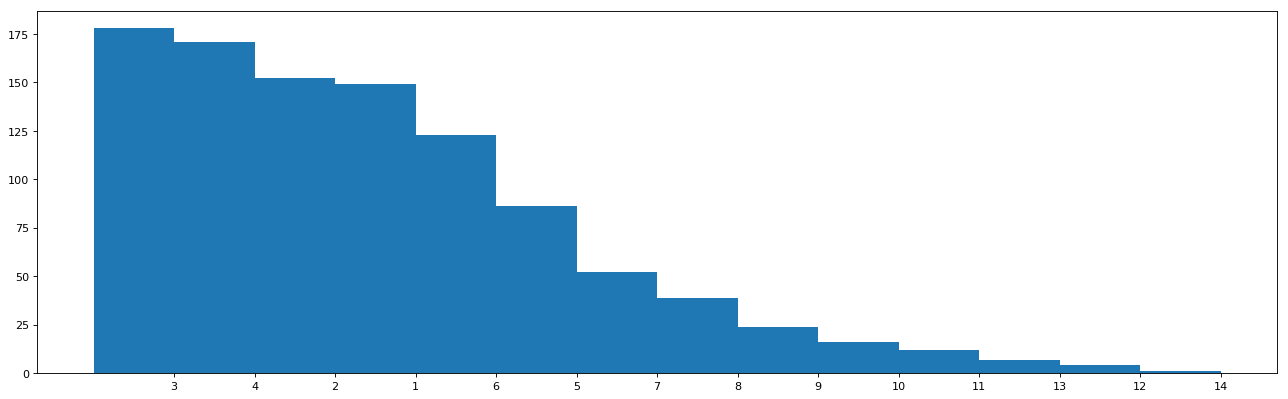

Counter({'.': 1, '?': 1})

In [68]:
'''
Word lengths histogram 
error: doc input string cannot succeed 1 million characters
'''

# read_files = glob.glob("/home/luluvyd/corpus/aclImdb/train/pos/*.txt")
read_files = glob.glob(directory + '*.txt')

counterWord = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterWord += analyzeWordLength(doc) 
        i += 1

mean = sum([k*v for k, v in counterWord.items()]) / sumCounter(counterWord)
print('average word lengths is : ' + str(mean))

plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterWord)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

counter

i : 0
i : 1
i : 2
percent of puncutation symbol is : 12.52465483234714


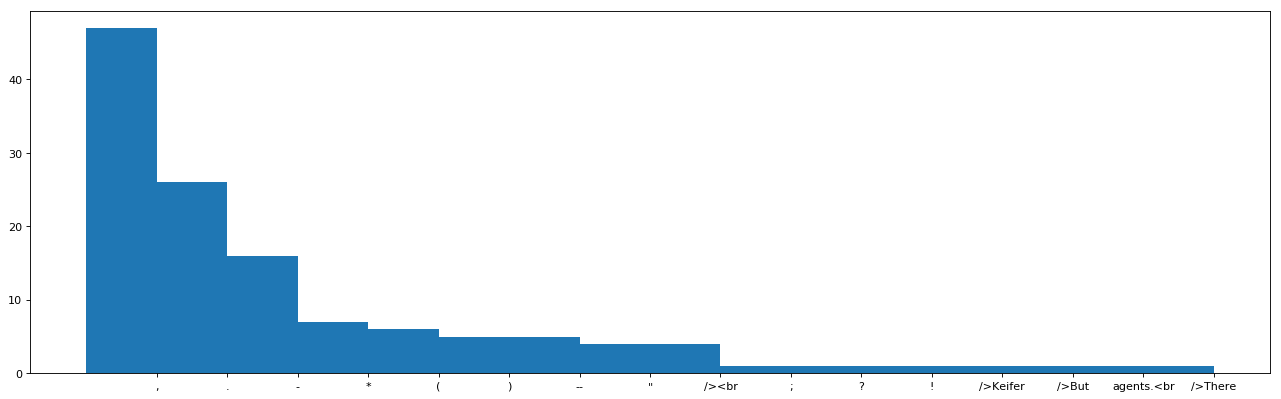

In [42]:
'''
Punctuation histogram
Percentage of punctuation out of total number of words
'''

# read_files = glob.glob("/home/luluvyd/corpus/aclImdb/train/pos/*.txt")
read_files = glob.glob(directory + '*.txt')

counterPun = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterPun += analyzePunctuation(doc) 
        i += 1
pert = sumCounter(counterPun) / sumCounter(counterWord)*100
print('percent of puncutation symbol is : ' + str(pert))
        
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterPun)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

i : 0
i : 1
i : 2
Counter({'it': 12, 'i': 6, 'his': 5, 'their': 5, 'you': 5, 'who': 4, 'her': 3, 'they': 3, 'he': 3, 'we': 2, 'my': 2, 'them': 2, 'she': 1, 'its': 1, 'themselves': 1, 'what': 1, 'myself': 1})


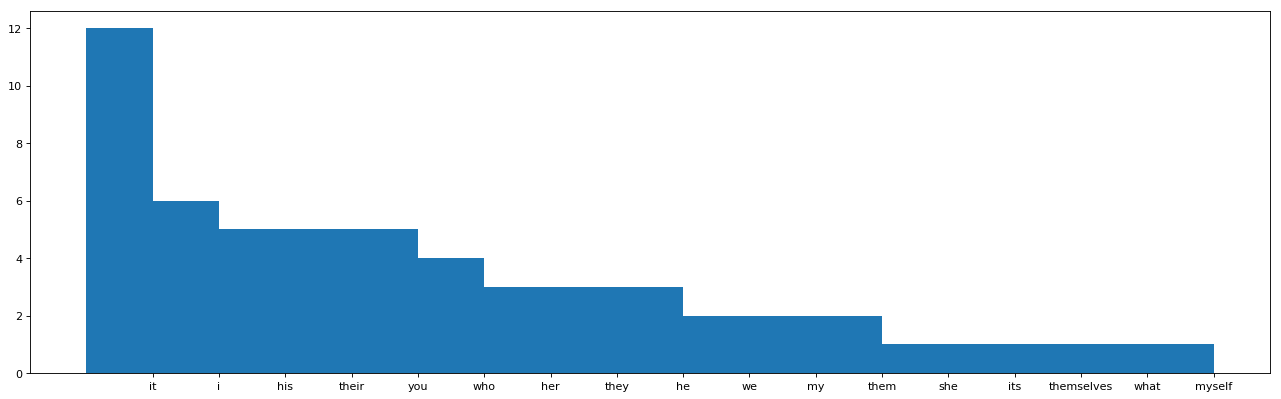

In [86]:
'''
Punctuation histogram
Percentage of punctuation out of total number of words
'''
read_files = glob.glob(directory + '*.txt')

counterPron = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterPron += analyzePronoun(doc) 
        i += 1
    
print(counterPron)
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterPron)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

i : 0
i : 1
i : 2
Counter({'it': 12, 'i': 6, 'his': 5, 'their': 5, 'you': 5, 'who': 4, 'her': 3, 'they': 3, 'he': 3, 'we': 2, 'my': 2, 'them': 2, 'she': 1, 'its': 1, 'themselves': 1, 'what': 1, 'myself': 1})


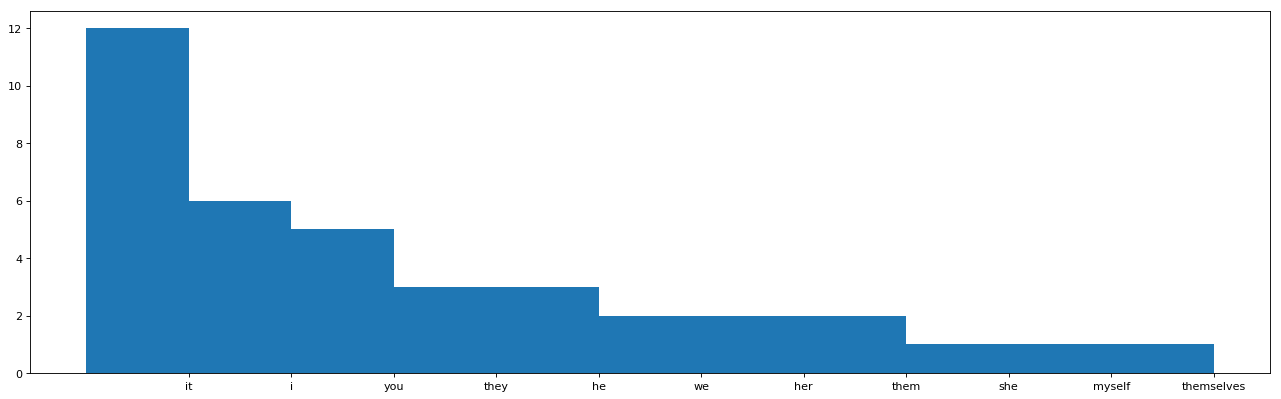

In [87]:
'''
Pronoun, personal histogram
Percentage of punctuation out of total number of words
'''
read_files = glob.glob(directory + '*.txt')

counterPronPRP = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterPronPRP += analyzePronounPRP(doc) 
        i += 1
    
print(counterPron)
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterPronPRP)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

i : 0
i : 1
i : 2
Counter({'their': 5, 'his': 5, 'my': 2, 'its': 1, 'her': 1})


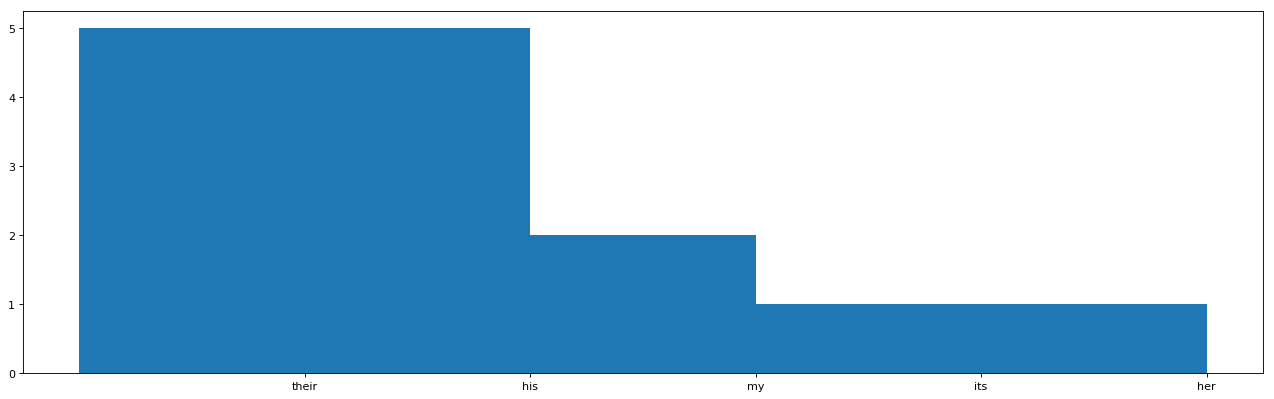

In [88]:
'''
pronoun, possessive histogram
Percentage of punctuation out of total number of words
'''
read_files = glob.glob(directory + '*.txt')

counterPronPRPD = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterPronPRPD += analyzePronounPRPD(doc) 
        i += 1
    
print(counterPronPRPD)
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterPronPRPD)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

i : 0
i : 1
i : 2
Counter({'who': 4, 'what': 1})


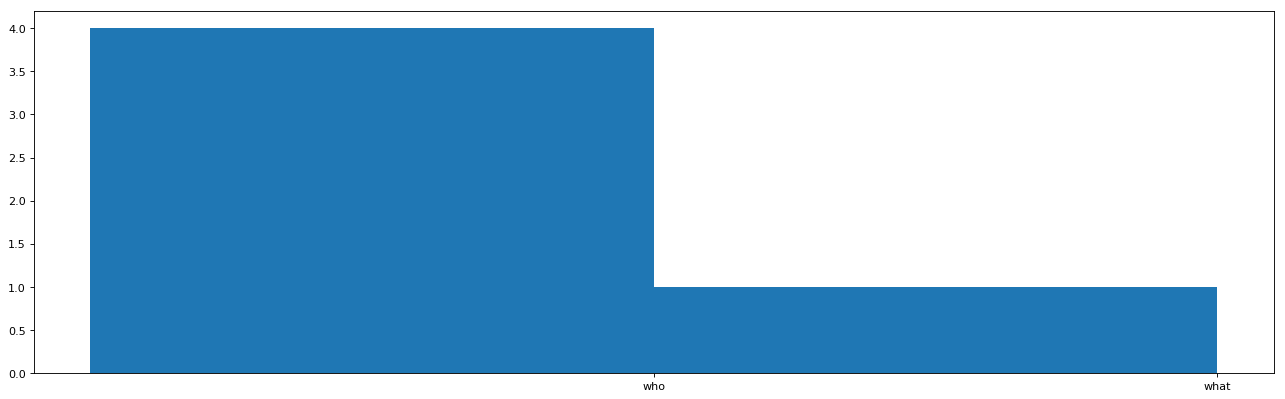

In [89]:
'''
pronoun, possessive histogram
Percentage of punctuation out of total number of words
'''
read_files = glob.glob(directory + '*.txt')

counterPronWP = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterPronWP += analyzePronounWP(doc) 
        i += 1
    
print(counterPronWP)
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterPronWP)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [56]:
'''
wh-pronoun, possessive histogram
Percentage of punctuation out of total number of words
'''
read_files = glob.glob(directory + '*.txt')

counterPronWPD = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterPronWPD += analyzePronounWPD(doc) 
        i += 1
    
print(counterPronWPD)
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterPronWPD)
if labels and values:
    indexes = np.arange(len(labels))
    width = 1
    plt.bar(indexes, values, width)
    plt.xticks(indexes + width * 0.5, labels)
    plt.show()

i : 0
i : 1
i : 2
Counter()


ValueError: not enough values to unpack (expected 2, got 0)

i : 0
i : 1
i : 2
Counter({'PRP': 38, 'PRP$': 14, 'WP': 5})


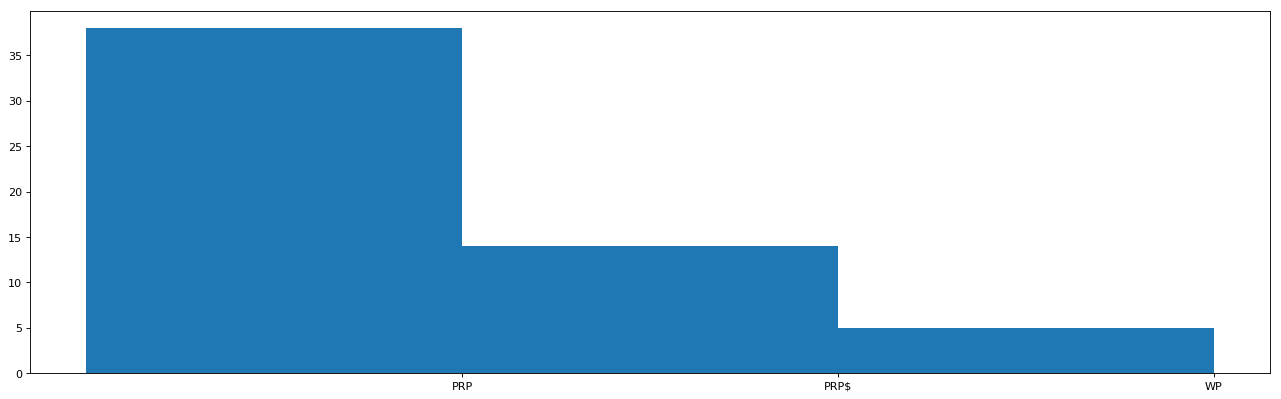

In [41]:
'''
4 pronoun categories histogram
Percentage of punctuation out of total number of words
'''
read_files = glob.glob(directory + '*.txt')

counterPronCat = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterPronCat += analyzePronounCategories(doc) 
        i += 1
    
print(counterPronCat)
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterPronCat)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

i : 0
i : 1
i : 2
Counter({'be': 32, 'have': 12, 'do': 6, 'get': 5, 'take': 4, 'age': 2, 'make': 2, 'guess': 2, 'track': 2, 'will': 2, 'turn': 2, 'seem': 2, 'come': 2, 'see': 2, 'look': 2, 'ala': 1, 'verge': 1, 'compromise': 1, 'fame': 1, 'lept': 1, 'know': 1, 'run': 1, 'could': 1, 'train': 1, 'lay': 1, 'hunt': 1, 'watch': 1, 'become': 1, 'find': 1, 'suffer': 1, 'put': 1, 'follow': 1, 'share': 1, 'can': 1, 'deserve': 1, 'ensue': 1, 'tell': 1, 'raise': 1, 'swallow': 1, 'satisfy': 1, 'outwit': 1, 'prefer': 1, 'move': 1, 'include': 1, 'face': 1, 'relegate': 1, 'compare': 1, 'feature': 1, 'fly': 1, 'sing': 1, 'believe': 1, 'rely': 1, 'mean': 1, 'cover': 1, 'tone': 1, 'boil': 1, 'shake': 1, 'implicate': 1, 'keep': 1, 'wait': 1, 'resemble': 1, 'end': 1, 'listen': 1, 'entertain': 1, 'assassinate': 1})


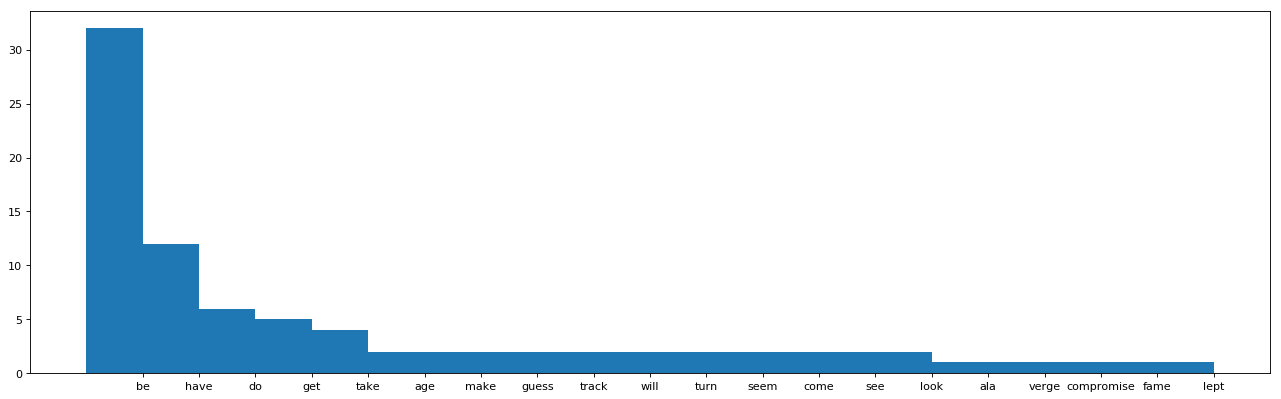

In [66]:
'''
Verb root words histogram
'''
read_files = glob.glob(directory + '*.txt')

counterVerbRoot = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterVerbRoot += analyzeVerb(doc) 
        i += 1
    
print(counterVerbRoot)
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterVerbRoot)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()